<a href="https://colab.research.google.com/github/Shashank-Mittal/Machine-Learning-from-Basics-to-Advanced/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


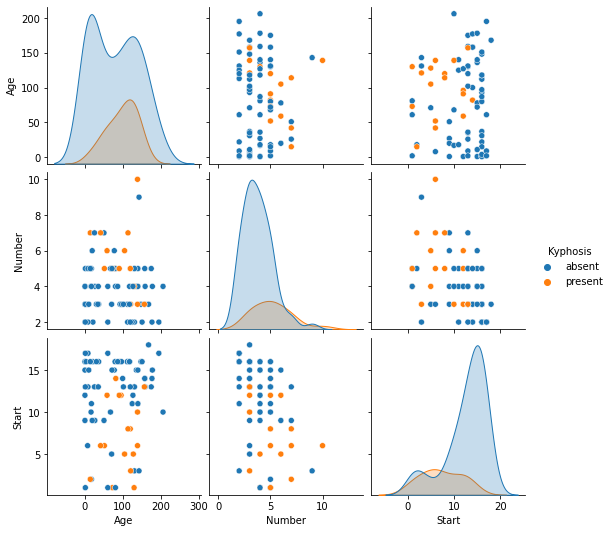

In [5]:
sns.pairplot(df, hue="Kyphosis")

In [6]:
from sklearn.model_selection import train_test_split
x = df.drop("Kyphosis",axis=1)
y= df["Kyphosis"]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

DTree_obj = DecisionTreeClassifier(criterion="entropy")

In [10]:
DTree_obj.fit(x_train,y_train)
Prediction = DTree_obj.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



In [15]:
confusion_matrix(y_test, Prediction)

array([[16,  1],
       [ 6,  2]])

In [17]:
from IPython.display import Image
import pydot
from six import StringIO
from sklearn.tree import export_graphviz

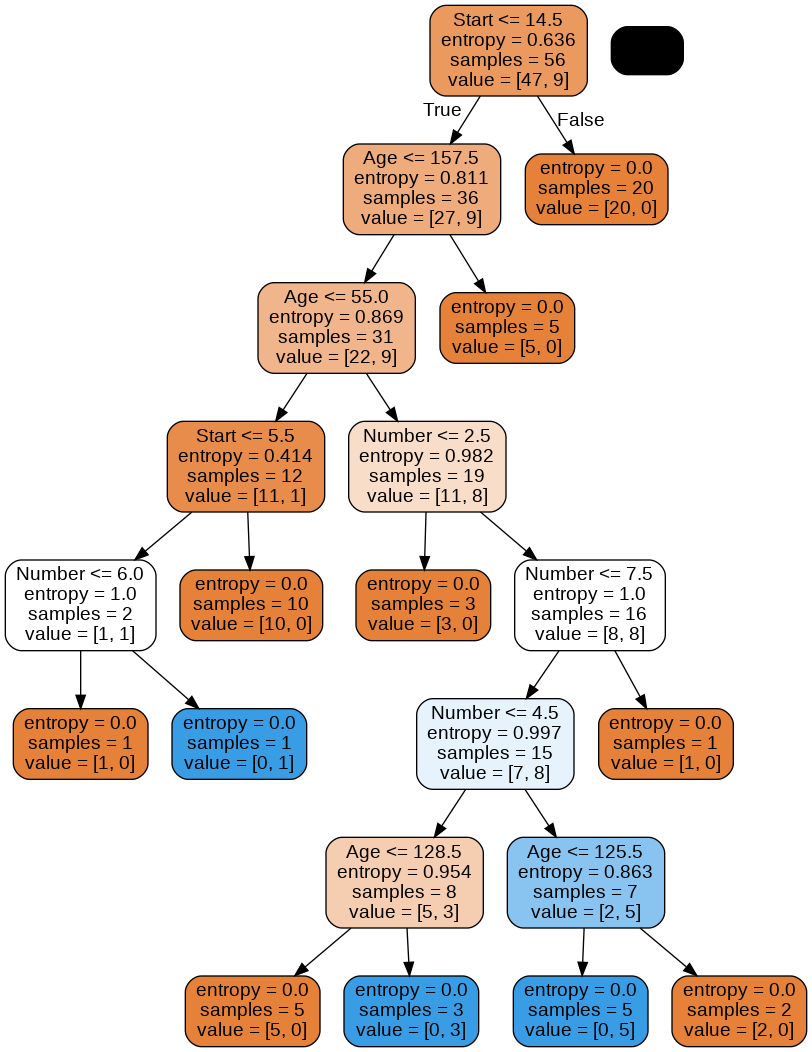

In [19]:
features = list(df.columns[1:])
features


dot_data = StringIO()  
export_graphviz(DTree_obj, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
prediction_random_forest = rfc.predict(x_test)

In [24]:
print(classification_report(y_test, prediction_random_forest))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

